# Oracle AutoMLx library in the conda pack automlx_p38_cpu_v#

#load dataset
import pandas as pd
from skilearn.datasets imports load_iris
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y, train_size=0.7, random_state=0)

X_train.shape, X_test.shape

#set AutoMLx engine
import automl
from automl import init

init(engine='local)

est = automl.Pipeline(task='classfication')
est.fit(X_train, y_train)
Pipeline()

from sklearn.metrics import f1_score
y_pred = est.predict(X_test)
score_default = f1_score(y_test, y_pred, average='macro')
print(f'Score on test data : {score_default}')

#Explain a classifier
explainer = automl.MLExplainer(est, X_train, y_train, task="classification")

result_explain.model_default = explainer.explain_model()
result_explai.model_default.to_dataframe()

#more details 
automl.interface.mlx.MLExplainer(model, X, y=None, task='classification', target_names=None,
                                score_metric=None,col_types=None, selected_features='auto')

                                

In [2]:
# Load dataset
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris data
data = load_iris()

# Create DataFrame for features
df = pd.DataFrame(data['data'], columns=data['feature_names'])

# Create Series for target
y = pd.Series(data['target'], name='target')

# Optional: combine into one DataFrame
iris_df = pd.concat([df, y], axis=1)

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y, train_size=0.7, random_state=0)

X_train.shape, X_test.shape

((105, 4), (45, 4))

In [6]:
!pip install oracle-automlx


   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.8 MB/s  0:00:00


In [9]:
#set yaml automlx
from flaml import AutoML

automl = AutoML() 
automl.fit(X_train, y_train, task="classification", time_budget=30)

# Evaluate
print("Best model:", automl.model.estimator)
print("Accuracy:", automl.score(X_test, y_test))

[flaml.automl.logger: 10-14 09:55:12] {1752} INFO - task = classification
[flaml.automl.logger: 10-14 09:55:12] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 10-14 09:55:12] {1862} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 10-14 09:55:12] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-14 09:55:12] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-14 09:55:12] {2417} INFO - Estimated sufficient time budget=2394s. Estimated necessary time budget=55s.
[flaml.automl.logger: 10-14 09:55:12] {2466} INFO -  at 0.3s,	estimator lgbm's best error=0.6579,	best estimator lgbm's best error=0.6579
[flaml.automl.logger: 10-14 09:55:12] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-14 09:55:12] {2466} INFO -  at 0.5s,	estimator lgbm's best error=0.6579,	best estimator lgbm's best error=0.6579
[flaml.automl.logger: 10-14 0

In [11]:
%pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/546.8 kB ? eta -:--:--
   ---------------------------------------- 546.8/546.8 kB 3.0 MB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.3 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.1 MB 6.7 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/38.1 MB 8.0 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.1 MB 8.9 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/38.1 MB 8.2 MB/s eta 0:00:04
   --------- ------------------------------ 8.7/38.1 MB 8.3 MB/s e

In [21]:
print(type(shap_values))             # should be list of arrays (one per class)
print(len(shap_values))              # number of classes, e.g. 3
print([arr.shape for arr in shap_values])  # shape of each class array
print(X_test.shape)                  # should be (samples, features), e.g. (38, 4)
print(feature_names)                 # list of feature names, length 4


<class 'numpy.ndarray'>
38
[(4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3)]
(38, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


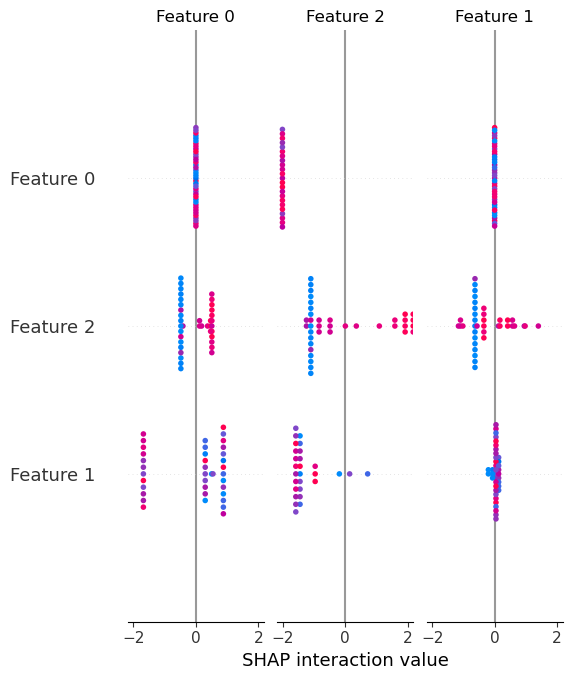

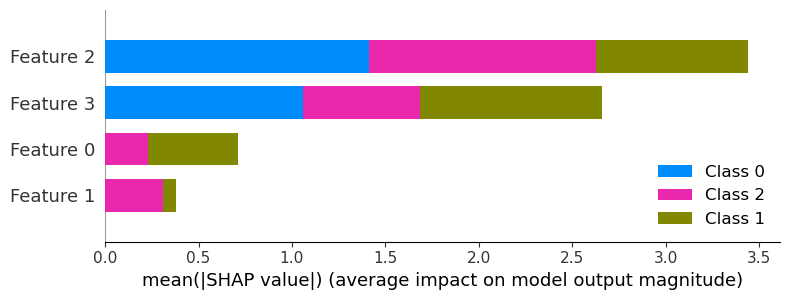

<class 'numpy.ndarray'>
38
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                0.0               0.0          -1.005822         -0.936778
1                0.0               0.0           2.030673          1.246154
2                0.0               0.0          -1.005822         -0.936778
3                0.0               0.0          -1.005822         -0.936778
4                0.0               0.0          -1.005822         -0.936778


In [22]:

"""
from flaml import AutoML
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

automl = AutoML()
automl.fit(X_train, y_train, task="classification", time_budget=30)


"""
import shap

# Extract raw XGBoost model from FLAML wrapper
xgb_model = automl.model.model

# Use SHAP TreeExplainer on raw model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


# Plot bar chart of feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Create DataFrame of SHAP values
feature_names = load_iris().feature_names



# Pick class 0 for explanation
# shap_values is a list of arrays per class
print(type(shap_values))  # list
print(len(shap_values))   # number of classes, e.g. 3

# Assuming shap_values is numpy ndarray of shape (samples, features, classes)
class_index = 0  # explain class 0

shap_values_class0 = shap_values[:, :, class_index]  # shape (38, 4)

shap_df = pd.DataFrame(shap_values_class0, columns=feature_names)
print(shap_df.head())